In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

## Objetivos

Los objetivos de hoy son:

Buscar un conjunto de datos a analizar:

Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

Esto se hace para que comprendais mejor los datos con los que estais trabajando.

Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [2]:
df= pd.read_csv("datos/supermarket.csv", index_col=0)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.drop('gross income', axis = 1, inplace = True)

In [4]:
df.drop(['gross margin percentage', 'cogs' ], axis = 1, inplace = True)

In [5]:
df.shape

(1000, 13)

In [6]:
df.sort_values(by = "Time")

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
Invoice ID,,,,,,,,,,,,,
522-57-8364,A,Yangon,Member,Male,Fashion accessories,51.34,8,20.5360,431.2560,1/31/2019,10:00,Ewallet,7.6
130-98-8941,C,Naypyitaw,Normal,Male,Fashion accessories,64.26,7,22.4910,472.3110,2/9/2019,10:00,Cash,5.7
316-68-6352,A,Yangon,Member,Female,Food and beverages,36.36,2,3.6360,76.3560,1/21/2019,10:00,Cash,7.1
606-80-4905,C,Naypyitaw,Member,Female,Sports and travel,19.15,6,5.7450,120.6450,1/29/2019,10:01,Credit card,6.8
679-22-6530,B,Mandalay,Normal,Female,Sports and travel,40.62,2,4.0620,85.3020,1/17/2019,10:01,Credit card,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
628-34-3388,C,Naypyitaw,Normal,Male,Fashion accessories,27.38,6,8.2140,172.4940,1/5/2019,20:54,Credit card,7.9
571-94-0759,B,Mandalay,Member,Female,Food and beverages,74.60,10,37.3000,783.3000,1/8/2019,20:55,Cash,9.5
715-20-1673,B,Mandalay,Normal,Male,Electronic accessories,28.38,5,7.0950,148.9950,3/6/2019,20:57,Cash,9.4


In [7]:
df.sort_values(by = "Date")

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
Invoice ID,,,,,,,,,,,,,
556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,1/1/2019,15:51,Cash,8.5
493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.4900,388.2900,1/1/2019,19:48,Credit card,7.0
651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.5830,621.2430,1/1/2019,13:55,Cash,7.7
133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.2870,132.0270,1/1/2019,11:43,Cash,5.0
746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.3150,888.6150,1/1/2019,11:36,Credit card,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308-47-4913,A,Yangon,Member,Female,Sports and travel,52.26,10,26.1300,548.7300,3/9/2019,12:45,Credit card,6.2
841-35-6630,C,Naypyitaw,Normal,Female,Electronic accessories,75.91,6,22.7730,478.2330,3/9/2019,18:21,Cash,8.7
616-87-0016,B,Mandalay,Normal,Male,Fashion accessories,95.54,7,33.4390,702.2190,3/9/2019,14:36,Credit card,9.6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   object 
 11  Payment        1000 non-null   object 
 12  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 109.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230,77.93500,99.96
Quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000,8.00000,10.00
Tax 5%,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Total,1000.0,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65
Rating,1000.0,6.972700,1.718580,4.0000,5.500000,7.000,8.50000,10.00


In [10]:
df.describe(exclude = np.number).T

,count,unique,top,freq
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,19:48,7
Payment,1000,3,Ewallet,345


In [11]:
df.duplicated().sum()

0

In [12]:
df['Time'].unique()

array(['13:08', '10:29', '13:23', '20:33', '10:37', '18:30', '14:36',
       '11:38', '17:15', '13:27', '18:07', '17:03', '10:25', '16:48',
       '19:21', '16:19', '11:03', '10:39', '18:00', '15:30', '11:24',
       '10:40', '12:20', '11:15', '17:36', '19:20', '15:31', '12:17',
       '19:48', '15:36', '19:39', '12:43', '14:49', '10:12', '10:42',
       '12:28', '19:15', '17:17', '13:24', '13:01', '18:45', '10:11',
       '13:03', '20:39', '19:47', '17:24', '15:47', '12:45', '17:08',
       '10:19', '15:10', '14:42', '15:46', '11:49', '19:01', '11:26',
       '11:28', '15:55', '20:36', '17:47', '10:55', '13:40', '12:27',
       '14:35', '16:40', '15:43', '15:01', '10:04', '18:50', '12:46',
       '18:17', '18:21', '17:04', '14:20', '15:48', '16:24', '18:56',
       '19:56', '18:37', '10:17', '14:31', '10:23', '20:35', '16:57',
       '17:55', '19:54', '16:42', '12:09', '20:05', '20:38', '13:11',
       '10:16', '18:14', '13:22', '11:27', '16:44', '18:19', '14:50',
       '20:54', '20:

El horario es de 10 a 21

In [13]:
df['Date'].unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

La fecha va de enero a marzo de 2019

In [14]:
# df["Date"]= pd.to_datetime(df["Date"])

In [15]:
# df["Time"] = pd.to_datetime(df["Time"])

intervalos para la variable Time
10 a 14 Mañana
14 a 18 tarde
18 a 21 noche

In [23]:
df["Time"].dtypes

dtype('O')

In [26]:
df["hora_compras"] = pd.cut(x=df["Time"], bins = 4, labels =["Mañana", "Tarde", "Noche"])

TypeError: can only concatenate str (not "float") to str

In [25]:
df["hora_compras"] = pd.cut(x=df["Time"], bins = [10:00, 14:00, 18:00, 21:00], labels =["Mañana", "Tarde", "Noche"])

SyntaxError: invalid syntax (2864481453.py, line 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   City           1000 non-null   object        
 2   Customer type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Product line   1000 non-null   object        
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Tax 5%         1000 non-null   float64       
 8   Total          1000 non-null   float64       
 9   Date           1000 non-null   datetime64[ns]
 10  Time           1000 non-null   datetime64[ns]
 11  Payment        1000 non-null   object        
 12  Rating         1000 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 141.7+ KB


In [ ]:
numericas = df.select_dtypes(include= np.number)
numericas.head()

,Unit price,Quantity,Tax 5%,Total,Rating
Invoice ID,,,,,
750-67-8428,74.69,7,26.1415,548.9715,9.1
226-31-3081,15.28,5,3.8200,80.2200,9.6
631-41-3108,46.33,7,16.2155,340.5255,7.4
123-19-1176,58.22,8,23.2880,489.0480,8.4
373-73-7910,86.31,7,30.2085,634.3785,5.3


In [ ]:
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

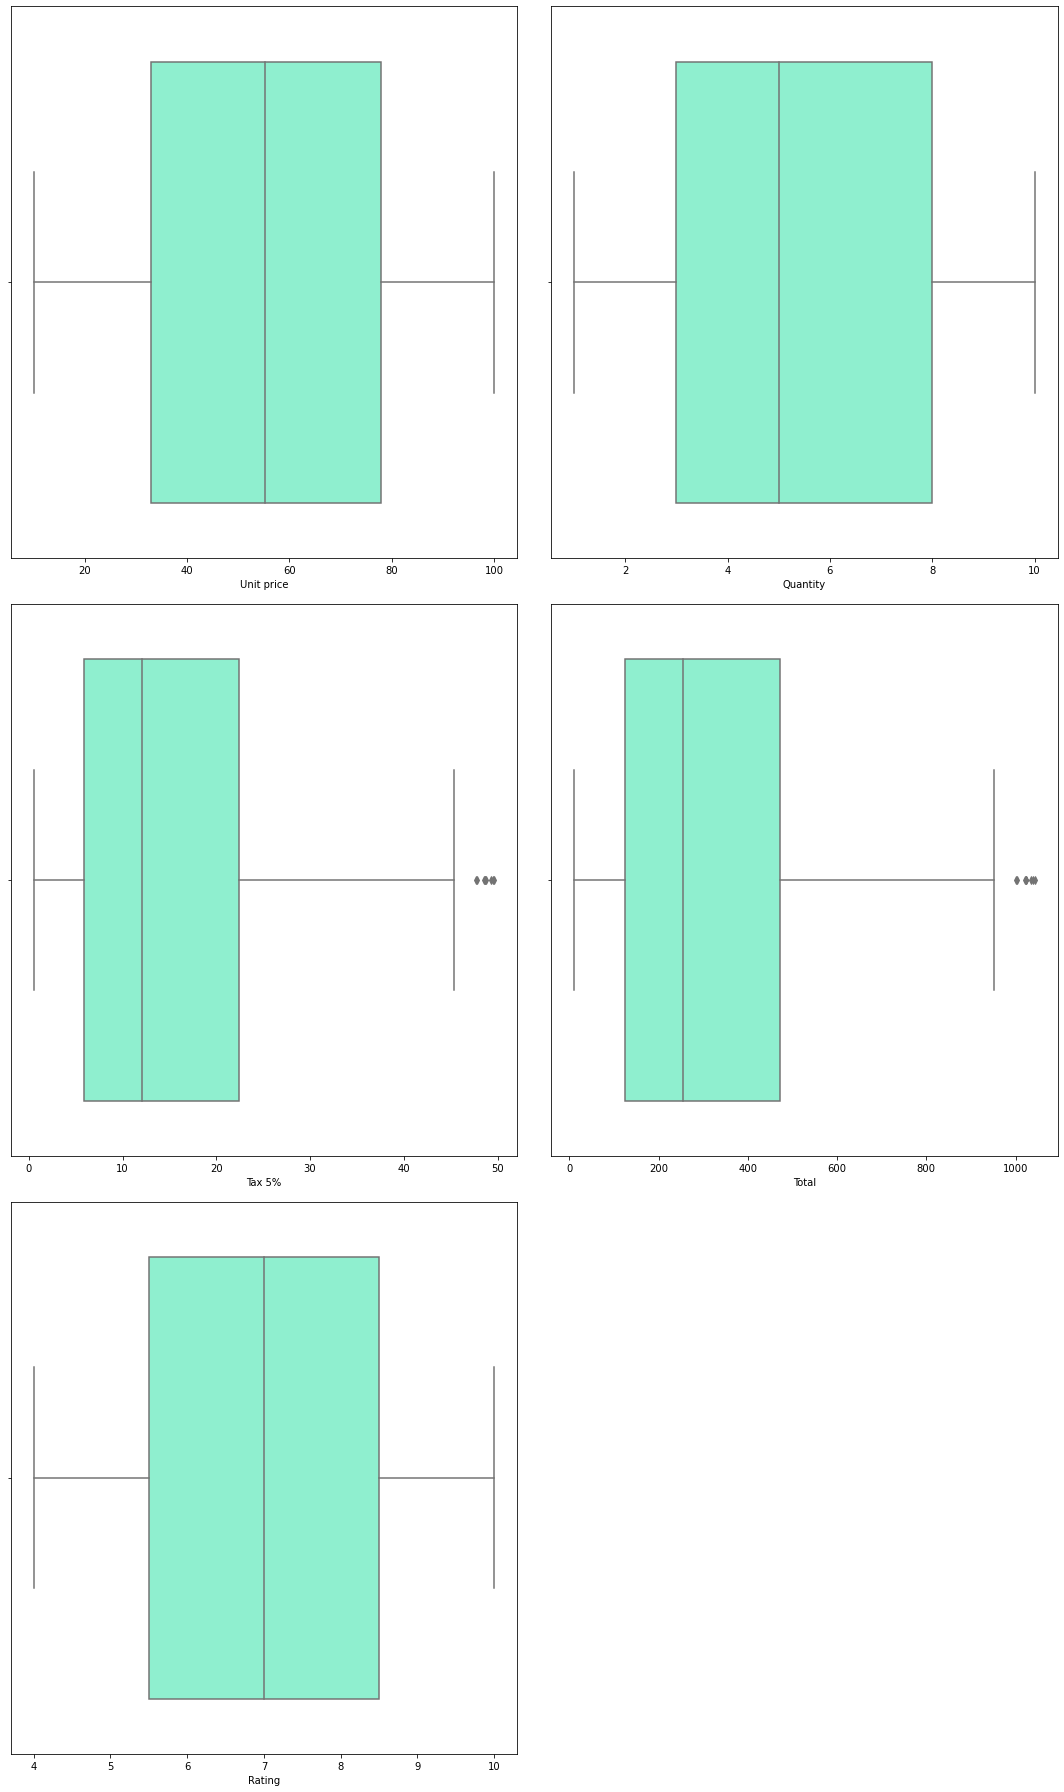

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

''

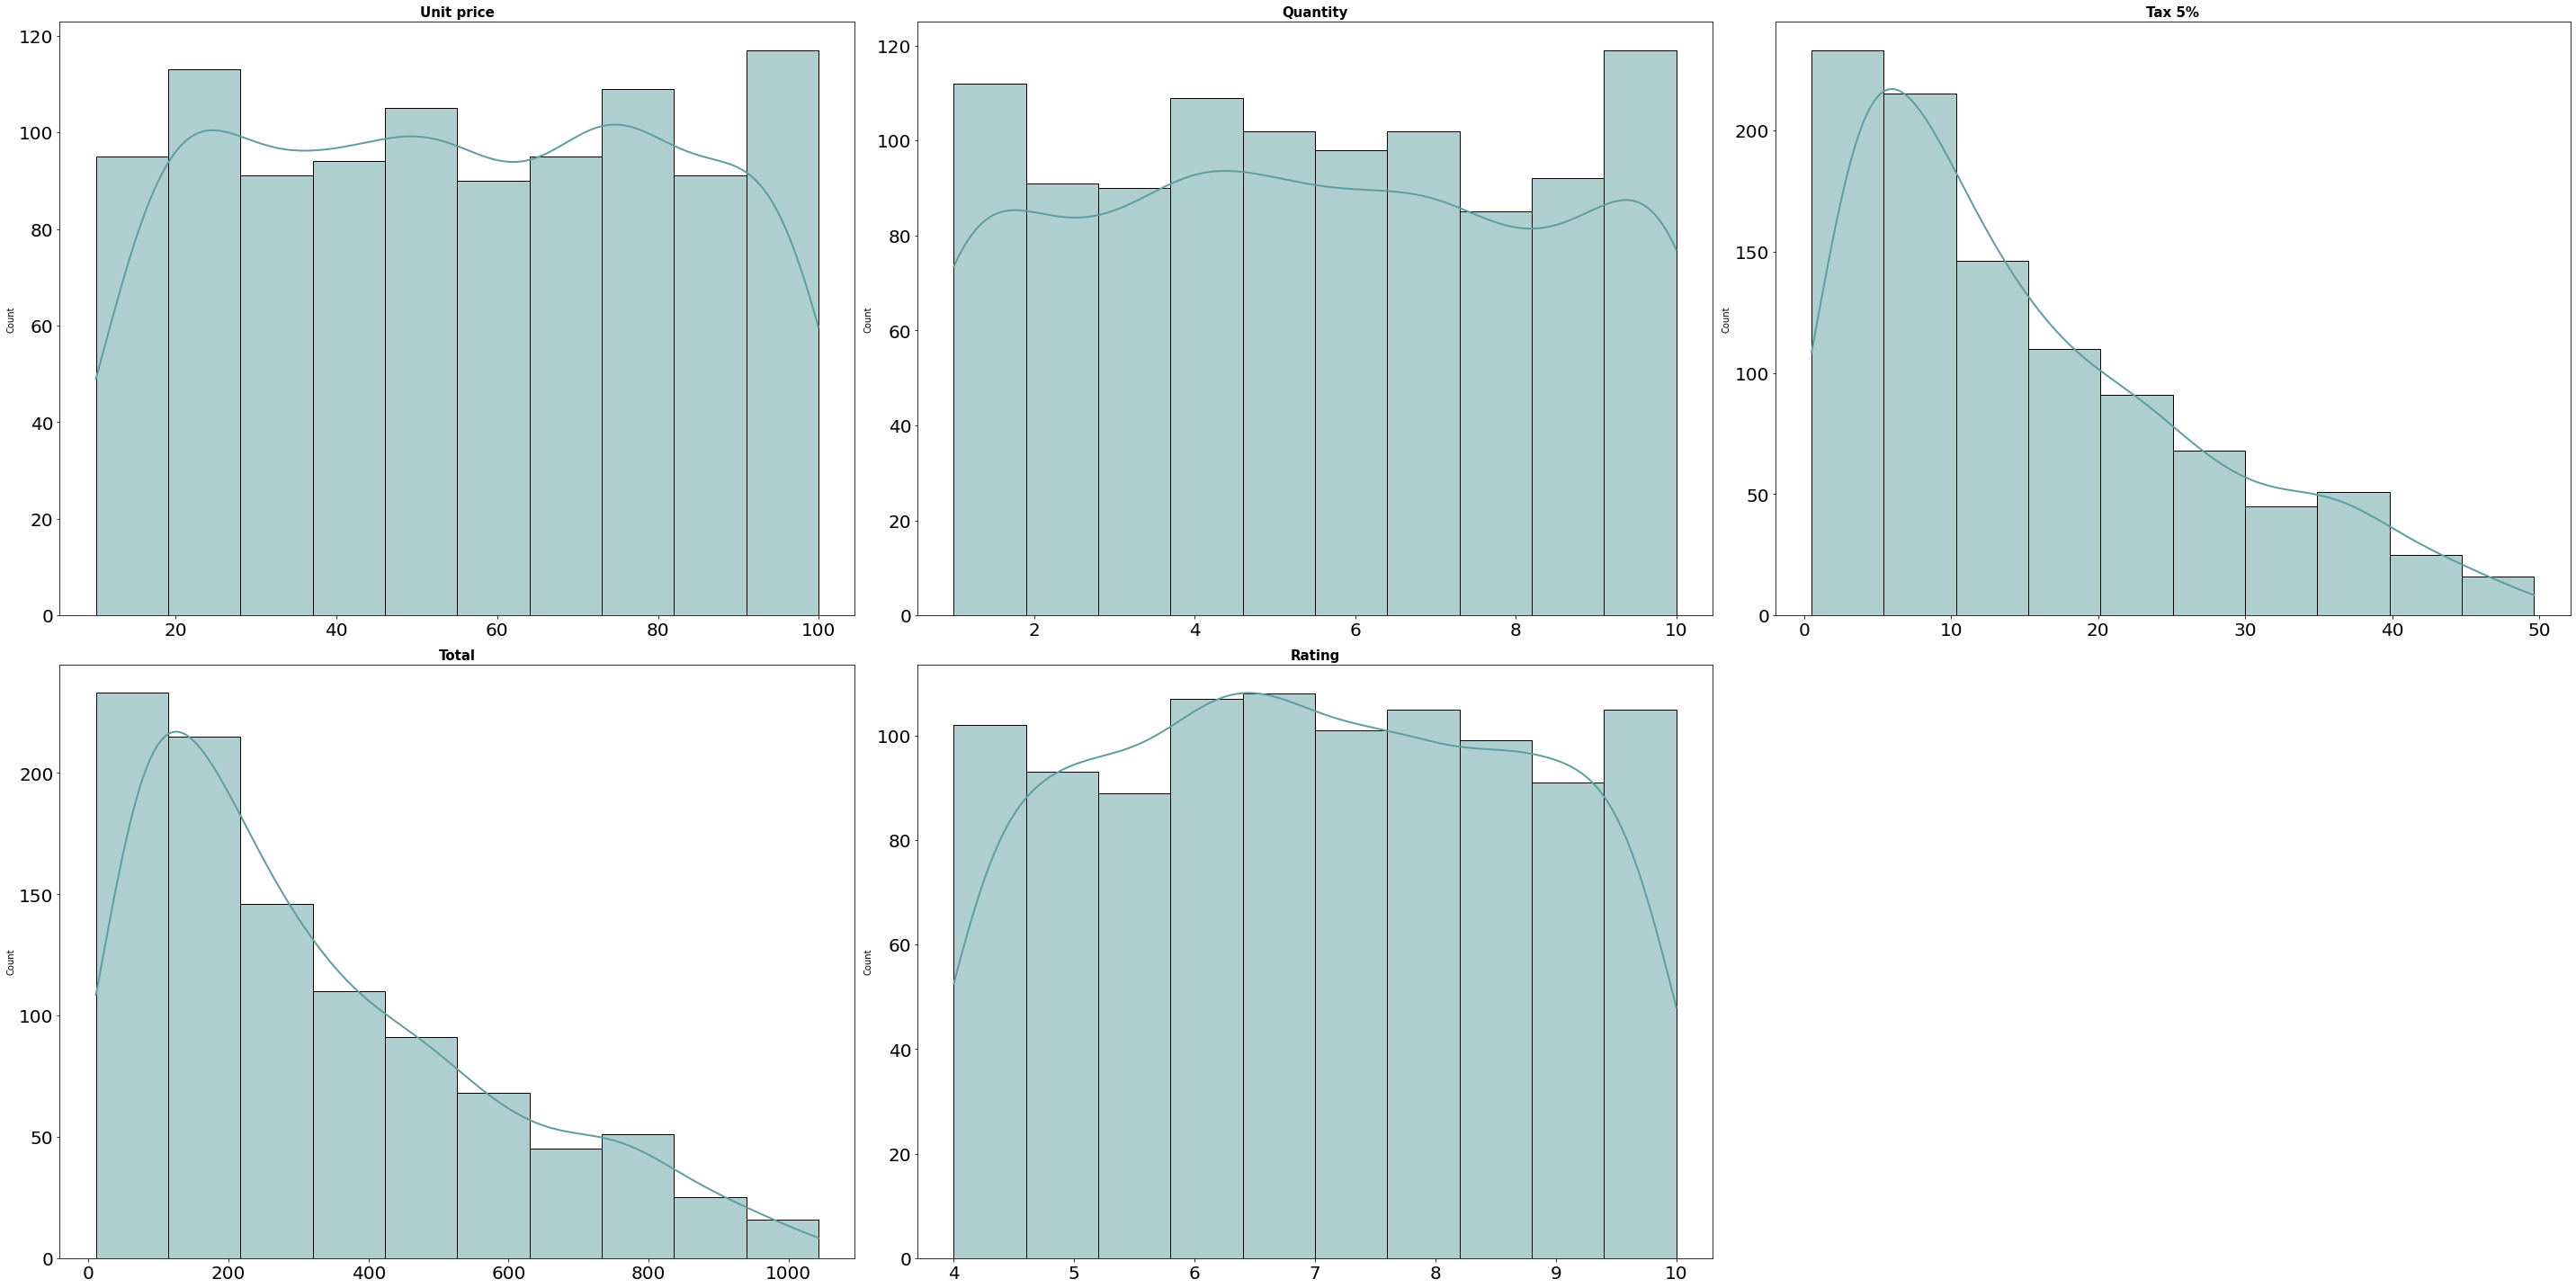

In [29]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (40, 20))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns


for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "cadetblue", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5,
        bins = 10, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
;

In [27]:
df["Quantity"].value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

In [ ]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,1.000000


In [ ]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
Invoice ID,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


<AxesSubplot:>

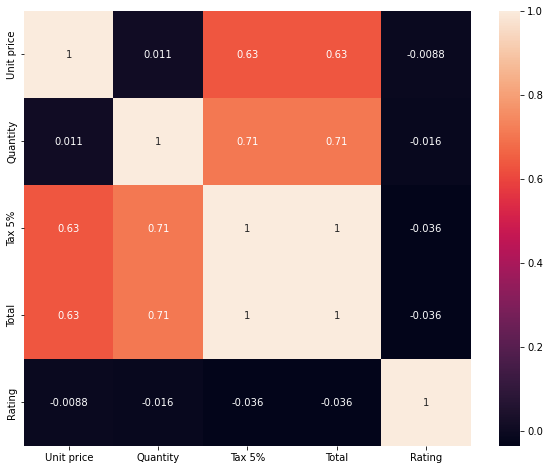

In [ ]:
sns.heatmap(numericas.corr(), annot = True)

In [24]:
df.to_csv("datos/supermarket2.csv")